<img src="img/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="center">


# Hands-on  introduction to Qiskit

## University of Minho

### Afonso Rodrigues and Ana Neri

### The "big picture"

<img src="img/qiskit_comp.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">

<!-- Here, we provide an overview of working with Qiskit. Qiskit provides the basic building blocks necessary to program quantum computers. --> 



<img src="img/qiskit_components.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">


<!-- este texto como uma nota e não em slides -->

<!-- The foundation of Qiskit is the **Terra** element. The basic concept of Qiskit Terra is an array of quantum circuits. A workflow using Terra consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** allows you to run them on different backends.  After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted, or allows you to make a better program for the next instance. -->

<!-- **Aqua** is where algorithms for NISQ computers are built. These algorithms can be used to build applications for quantum computing. Aqua is accessible to domain experts in chemistry, optimization or AI, who want to explore the benefits of using quantum computers as accelerators for specific computational tasks, without needing to worry about how to translate the problem into the language of quantum machines. -->

<!-- With **Aer** it is possible to access high-quality, high-performance simulators and continue to improve their scalability and features. Aer will help us understand the limits of classical processors by demonstrating to what extent they can mimic quantum computation. Furthermore, we can use Aer to verify that current and near-future quantum computers function correctly. -->

<!-- **Ignis** is a framework for understanding and mitigating noise in quantum circuits and devices. Ignis provides self-contained experiments that include tools for generating the circuits that can be executed on real backends via Terra (or on simulators via Aer) and the tools for fitting the results and analysing the data. -->

# Contents

* [Recall the theory](#theory)
* [First Quantum Circuit](#firstQC)
* [Simulating circuits with Qiskit Aer](#aer_simulation)
* [Running circuits using the IBMQ provider](#ibmq_provider)
* [Deutsch-Josza Algorithm](#Deutsch)
* [Ignis](#ignis)

<!--[Summary of quantum operations](#quantum_operations)-->

<!--[Circuit basics](#circuit_basics)-->

<!--[Simulating circuits with Qiskit Aer](#aer_simulation)-->

<!--[Running circuits using the IBMQ provider](#ibmq_provider)-->

<!--[Practical exercises](#exercises)-->

## Recall the theory

<!-- ## Single Qubit Quantum states -->

A single qubit quantum state <!-- can be written as -->

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$


<!-- where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $|0\rangle$ is $|\alpha|^2$ and $|1\rangle$ is $|\beta|^2$.--> As a vector this is

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

<!-- Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $|\psi\rangle := e^{i\delta} |\psi\rangle$ we only require two real numbers to describe a single qubit quantum state. -->

<!-- A convenient representation is -->
Another representation is

$$|\psi\rangle = \cos \left( \frac{\theta}{2} \right)|0\rangle + \sin\left( \frac{\theta}{2}\right) e^{i\phi}|1\rangle$$

<!-- where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state. -->

### Bloch sphere
<center>
<img src="img/Bloch_sphere.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px">
</center>

<!-- By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis. --> 



Quantum gates/operations may be represented as matrices. <!-- A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. --> 

The action of the quantum gate is expressed by the product of its matrix with the vector representing the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

<!-- A general unitary must be able to take the $|0\rangle$ to the above state. That is -->

<!-- $$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ -->

<!-- where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving --> 

The most general form of a single qubit unitary gate

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

<!-- This is the most general form of a single qubit unitary. -->

<a id = 'firstQC'></a>

## Let's start building a circuit 

In [1]:
# Ignore warnings for the purpose of this demonstration
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [3]:
# Relevant QISKit modules
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [4]:
# Auxiliary functions for circuit execution
from qiskit import Aer, BasicAer, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer

def show_results(D):
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()


# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim, shots=1000)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("Simulation: \n\n", result_counts)
    
    if draw_circuit: # draw the circuit
        qc.draw()
    else: # or show the results
        show_results(result_counts)

In [5]:
# Create registers
qr0 = QuantumRegister(2)
# you only need the classical register if you want to do measurement!
cr0 = ClassicalRegister(2)

# Create quantum circuit
qc = QuantumCircuit(qr0, cr0)

qc.draw()

#### Circuits are the primary unit of computation in Terra!

Circuits contain:

* name - for referencing the circuit later
* data - list of gates in the circuit
* registers - quantum and classical registers

They do **not** contain information about possible backends.

# Gates

Although the basic gate set of IBM Q devices is $$\{id, u1, u2, u3, cx\}$$ QISKit supports many gates. (check the [Summary of quantum operations](https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/terra/summary_of_quantum_operations.ipynb) in the tutorials of terra) 

#### Example: Gate $X$ (bit-flip gate)

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. This is quantum analogue to a classical NOT gate.

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<center>
<img src="img/xbloch.png" width="700 px">
</center>

#### Example: $Z$ (phase-flip gate)

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $. In the Bloch sphere representation, and similarly to the $X$ gate, it rotates the state around the $Z$ axis by $\pi$ radians.

#### Example: Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. <!-- On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the states has equal value. -->

<center>
<img src="img/hbloch.png" width="700 px">
</center>

<!-- In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement, as shown in the following figure.


<img src="img/hhbloch.png" width="700 px" align="center">
-->

The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

## Computational and superposition basis<a id='gates_basis'></a>

Any set of orthogonal states spanning all dimensions of the Hilbert space of the quantum state can be used as a basis. The Hadamard gate may be used to easily change between the computational ($| 0 \rangle$ and $|1 \rangle$) and the superpositon basis, where:

- $| + \rangle = \frac{1}{\sqrt{2}} | 0 \rangle + | 1 \rangle$
- $| - \rangle = \frac{1}{\sqrt{2}} | 0 \rangle - | 1 \rangle$

<center>
<img src="files/img/h_x_z.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px">                                                                                           
</center>


The above diagram is a useful shorthand for quantum states conversion using quantum gates, and it also depicts the consequences of reversible computation. Literally, you can have a qubit in any of the four states $|0\rangle$, $|1\rangle$, $|-\rangle$, $|+\rangle$  and obtain any other from it by performing simple one qubit gates.

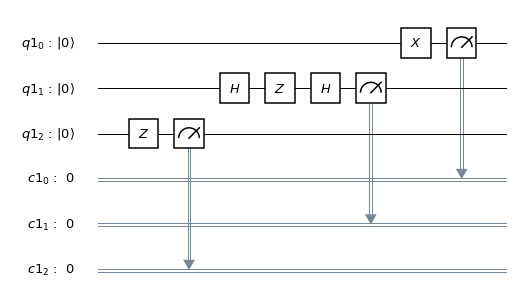

In [6]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc_basis = QuantumCircuit(qr, cr)
# An X gate in the computational basis
qc_basis.x(qr[0])
# Is equivalent to a Z gate in the superposition basis
qc_basis.h(qr[1])
qc_basis.z(qr[1])
qc_basis.h(qr[1])
# What happens when we apply the Z gate without changing basis?
qc_basis.z(qr[2])
# Measure qubits into classical register
qc_basis.measure(qr,cr)
# Draw the quantum circuits
qc_basis.draw(output='mpl')

Simulation: 

 {'011': 1000}


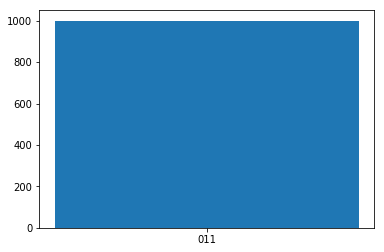

In [7]:
execute_locally(qc_basis)

## CNOT and other multi-qubit operations

No set of quantum gates containing only single qubit operations can ever be universal (i.e. form a basis to perform any quantum operation on a multi-qubit quantum system).

The CNOT gate, also known as controlled-X, is the fundamental two-qubit gate. Together with a generalized single-qubit unitary gate, we are able to decompose **any** multi-qubit operation. The CNOT gate takes one qubit as control, and one qubit as target.

- if the control qubit is in the state $| 0 \rangle$, the target qubit is left alone;
- if the control qubit is in the state $| 1 \rangle$, the X gate is applied to the target qubit.

<center>
<img src="files/img/cnot.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="200 px">       
</center>
This gate allows us to unlock a powerful property of quantum particles: **entanglement**. Without it, quantum computers would lose most of their potential advantage over the classical computing paradigm.

In quantum circuits, CNOT gates are used to entangle pairs of qubits.

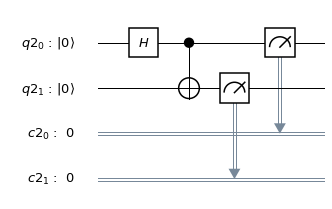

In [8]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc_multi_qubit = QuantumCircuit(qr, cr)

qc_multi_qubit.h(qr[0])
qc_multi_qubit.cx(qr[0],qr[1])

qc_multi_qubit.measure(qr,cr)

qc_multi_qubit.draw(output='mpl')

Simulation: 

 {'11': 520, '00': 480}


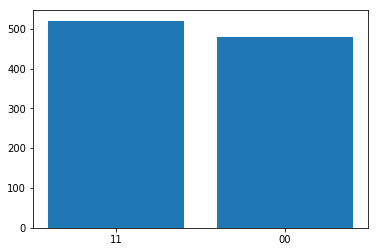

In [9]:
execute_locally(qc_multi_qubit)

Other commonly mentioned multi-qubit gates (which can be decomposed into CNOT's):

- The SWAP gate, which exchanges the state of two qubits;

- The Tofolli gate, also known as CCNOT.

<a id = 'aer_simulation'></a>

# Simulating circuits with Qiskit Aer

<div class="alert alert-block alert-info">
<p>In version 0.7 <b> Aer </b> was rename to <b> BasicAer </b>. </p>

<p><b>Aer</b> will be used to fancier and larger packages.</p>
</div>

#### Aer vs BasicAer 

* BasicAer: Terra's built-in suite of pure-python simulators

* Aer: Qiskit's suite of high-performance simulators (faster and with noise sophisticated models - aer.noise)


In [10]:
from qiskit import BasicAer, execute

<div class="alert alert-block alert-info">
<p>To run the circuit you need to add measurement gates! </p>

<p> <b>Note</b>: it is always a good ideia to add barrier before the measurement gates!</p>
</div>

In [11]:
qc.measure(qr0, cr0)
qc.draw()

In [12]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

#### Simulators 

* statevector_simulator : This is the qasm_simulator with a snapshot at the end
  <p> Returns result object containing a dictionary of basis states with complex amplitudes for each</p>
* unitary_simulator : Returns a matrix of your circuit!
* ibmq_qasm_simulator : a public simulator on an HPC machine run by IBM (Note, this is under the IBMQ provider)

### Statevector_simulator

In [13]:
qc_superposition = QuantumCircuit(qr,cr)
qc_superposition.h(qr[0])
qc_superposition.measure(qr[0],cr[0])
qc_superposition.draw()

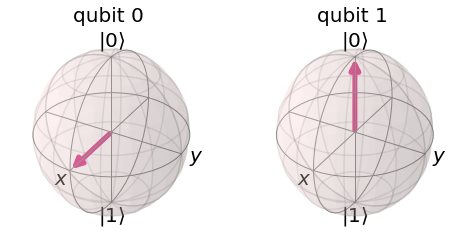

In [14]:
backend = BasicAer.get_backend("statevector_simulator")

# Import plotting tools
from qiskit.tools.visualization import plot_bloch_multivector

# Plot the Bloch sphere of the qubit state after performing the Hadamard gate
result_h = execute(qc_superposition, backend).result()
bloch_h= result_h.get_statevector(qc_superposition)
plot_bloch_multivector(bloch_h)

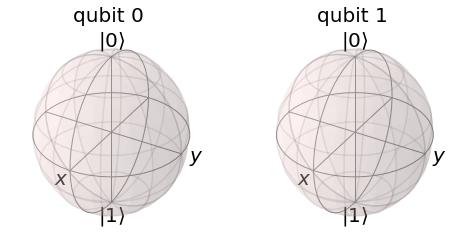

In [15]:
# Plot the Bloch sphere of the qubit state after creating entanglement
result_bell = execute(qc_multi_qubit, backend).result()
bloch_bell= result_bell.get_statevector(qc_multi_qubit)
plot_bloch_multivector(bloch_bell)

### qasm_simulator

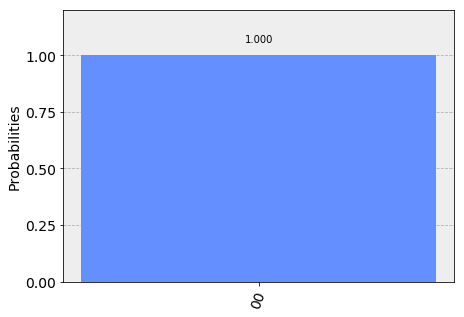

In [16]:
backend = BasicAer.get_backend("qasm_simulator")

shots = 1024
job_bell = execute(qc, backend, shots=shots)

from qiskit.tools.visualization import plot_histogram

result_bell = job_bell.result()
counts_bell = result_bell.get_counts(qc)
plot_histogram(counts_bell)

<a id = 'ibmq_provider'></a>

# IBM Q Provider: Running in quantum devices 

In [17]:
from qiskit import IBMQ

In [18]:
import sys
#path to your Qconfig file
sys.path.insert(0,'.\..\..')

import Qconfig_IBM_experience
import Qconfig_IBM_network

In [19]:
# Or you can use:
IBMQ.enable_account(Qconfig_IBM_experience.APItoken)
IBMQ.enable_account(Qconfig_IBM_network.APItoken, Qconfig_IBM_network.url)

# IMBQ.load_account()

print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-academic, univ-minho, group-1-test)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-academic, univ-minho, group-1-test)>]

In [20]:
from qiskit.tools.monitor import backend_overview

backend_overview()

ibmq_20_tokyo               ibmq_16_melbourne            ibmqx2
-------------               -----------------            ------
Num. Qubits:  20            Num. Qubits:  14             Num. Qubits:  5
Pending Jobs: 0             Pending Jobs: 3              Pending Jobs: 12
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      84.9          Avg. T1:      44.3           Avg. T1:      54.1
Avg. T2:      52.4          Avg. T2:      58.4           Avg. T2:      51.1



ibmqx4
------
Num. Qubits:  5
Pending Jobs: 70
Least busy:   False
Operational:  True
Avg. T1:      46.5
Avg. T2:      18.0





        from qiskit.tools.jupyter import *

        %qiskit_backend_overview
        
<img src="img/overview.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">


In [21]:
from qiskit.tools.monitor import backend_monitor

backend = IBMQ.get_backend('ibmq_20_tokyo')

backend_monitor(backend)

ibmq_20_tokyo
Configuration
-------------
    n_qubits: 20
    operational: True
    status_msg: active
    pending_jobs: 0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    url: None
    hamiltonian: {'h_str': [''], 'h_latex': '', 'osc': {}, 'vars': {}}
    max_shots: 8192
    max_experiments: 900
    rep_times: [50, 500, 1000]
    description: 20 qubit device Tokyo remapped
    u_channel_lo: []
    open_pulse: False
    online_date: 2018-05-10T04:00:00+00:00
    sample_name: Qubert
    meas_lo_range: [[6.090508695, 8.090508695], [6.224394221, 8.224394221], [6.098107634, 8.098107634], [6.310698823, 8.310698823], [6.16798539, 8.16798539], [6.297936311, 8.297936311], [6.156332717, 8.156332717], [6.26951458, 8.26951458], [6.20472734, 8.20472734], [6.254023964, 8.254023964], [6.114162303, 8.114162303], [6.225126594, 8.225126593999999], [6.113678533, 8.113678533], [6.310187362, 8.310187362], [6.170311462, 8.170311462], [6.281813827, 8.281813827], [6.

        from qiskit.tools.jupyter import *

        %qiskit_backend_monitor
        
<img src="img/backend_monitor.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">


In [22]:
shots = 1024       # Number of shots to run the program (experiment); maximum is 8192 shots.
job_exp = execute(qc, backend, shots = shots)

from qiskit.tools.monitor import job_monitor

job_monitor(job_exp, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [23]:
# job_id allows you to retrive old jobs
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))

job_get=backend.retrieve_job(jobID)
job_get.result().get_counts(qc)

JOB ID: 5c9e455b49f7c50050a3d825


{'00': 997, '01': 19, '10': 8}

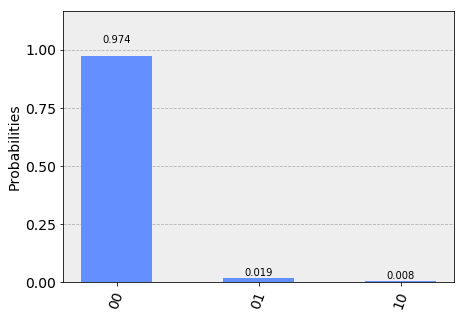

In [24]:
# We recommend increasing the timeout to 30 minutes to avoid timeout errors when the queue is long.
result_real = job_exp.result(timeout=3600, wait=5)
counts = result_real.get_counts(qc)
plot_histogram(counts)

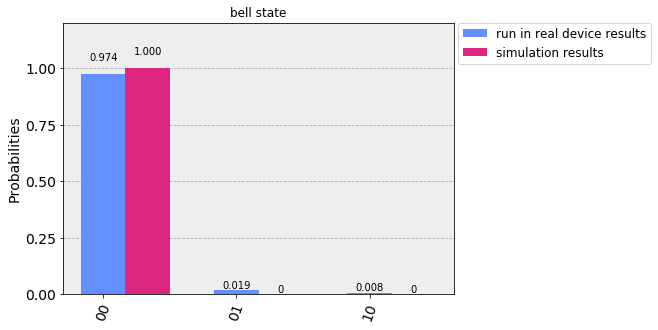

In [25]:
title = 'bell state'
legend = ['run in real device results', 'simulation results']


plot_histogram([counts, counts_bell], legend = legend, title= title)

<a id ='Deutsch'></a>

# Deutsch-Josza Algorithm 

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$  bits into either 0 or 1. We do not know the logic behind it. We know that it is either constant or balanced:
- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half the input value and 1 for the other half


For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. If we are given a black box, an **oracle**, that takes as input this two bits and outputs the unknown value.
<center>
<img src="files/img/c_oracle.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px">
</center>

To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. 

Before transforming it into a quantum problem, we need our black box to be an oracle which allows for **reversible computation**, like so:

<center>
<img src="files/img/q_oracle.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" >
</center>

### Algorithm


Let us imagine the following procedure:
- We begin with two qubits, q0 in state $|0\rangle$ and q1 in state $|1\rangle$ ($|01\rangle$).

- We apply a Hadamard to each qubit, the result is $\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

- We now call our oracle, which maps $|ab\rangle$ or $|a\rangle |b\rangle$ (easier to interpret) into $|a\rangle |b \oplus f(a)\rangle$ the result is:

$$\frac{1}{2}( \; |0\rangle |0\oplus f(0)\rangle - |0\rangle |1\oplus f(0)\rangle + |1\rangle |0\oplus f(1)\rangle - |1 \rangle |1\oplus f(1)\rangle \;)$$

We can now use the following equivalence:

$$|0 \oplus a\rangle - |1 \oplus a\rangle =  (-1)^a(|0\rangle - |1\rangle)$$

To replace above and get:

$$\frac{1}{2}(|0\rangle \; [(-1)^{f(0)}(|0\rangle - |1\rangle)]\; +\; |1\rangle \;[(-1)^{f(1)}(|0\rangle - |1\rangle)])$$

This quantum state can be separated into the product state:

$$ [\frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(1)}| 1 \rangle] \; \otimes \; [\frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle] $$

Our second qubit can be ignored, and what remains is our first qubit, which contains both $f(0)$ and $f(1)$ - both images of $f$ with a single pass over the oracle. This can further be simplified as:

$$(-1)^{f(0)}(\frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(0) \oplus f(1)} | 1 \rangle)$$


Lastly, we apply a Hadamard gate on our qubit and we arrive at:

$$(-1)^{f(0)} |f(0) \oplus f(1)\rangle$$

What is the meaning of this?
- if f is constant ($00$ or $11$) $\rightarrow$ output is $0$ (xor is 0)
- if f is balanced ($01$ or $10$) $\rightarrow$ output is $\pm 1$ (xor is 1)

Which, in fact, means that we can do a *single pass* over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing. 

Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes, while a quantum function would still require 1 pass.

<center>
<img src="files/img/q_oraclen.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px">
</center>

Deutsch-Josza's algorithm illustrates the notion of **quantum parallelism**: a quantum register has the ability to exist in a superposition of base states - each one may be thought of as a single argument to a function. A function performed on the register in a superposition of states is thus performed on each of the components of the superposition, _while only being applied once_.

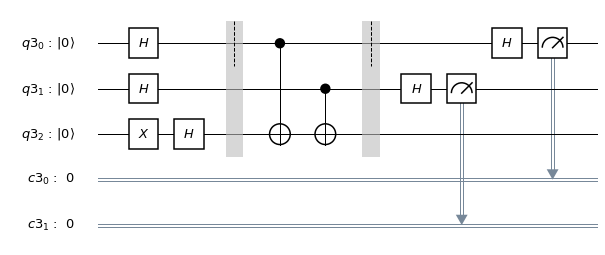

In [26]:
# Create a quantum circuit with 3 qubits and 2 bits
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
# Flip ancilla qubit to |1>
qc.x(qr[2])
# Apply Hadamard gate to the whole register
qc.h(qr)
# Oracle
qc.barrier()
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()
# Return qubits to the computational basis
qc.h(qr[0])
qc.h(qr[1])
# Measure
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw(output='mpl')

In [27]:
backend = BasicAer.get_backend("qasm_simulator")

shots = 1024
job_DJ_s = execute(qc, backend, shots=shots)

result_DJ_s = job_DJ_s.result()
counts_DJ_sim = result_DJ_s.get_counts(qc)

In [28]:
backend = IBMQ.get_backend('ibmq_20_tokyo')

shots = 1024
job_DJ_r = execute(qc, backend, shots=shots)

jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 5c9e46bb54ca3d0062df21cb


In [29]:
job_get=backend.retrieve_job(jobID_DJ_r)
result_DJ_r = job_get.result()
counts_DJ_run = result_DJ_r.get_counts(qc)

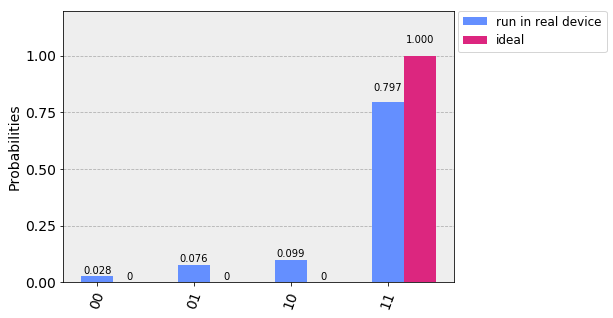

In [30]:
plot_histogram([counts_DJ_run, counts_DJ_sim ], legend=[ 'run in real device', 'ideal'])

<a id = 'ignis'></a>

# Ignis 

<img src="files/img/ignis_overview.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">

In [31]:
from qiskit.ignis.mitigation.measurement import ( complete_meas_cal, CompleteMeasFitter, MeasurementFilter )

In [32]:
# Generate the calibration circuits
qr = QuantumRegister(3)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1], qr=qr, circlabel='mcal')

In [33]:
state_labels

['00', '01', '10', '11']

In [34]:
job_ignis = execute(meas_calibs, backend=backend, shots=1000)
cal_results = job_ignis.result()

In [35]:
# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[0.967 0.122 0.055 0.015]
 [0.015 0.86  0.001 0.04 ]
 [0.016 0.003 0.934 0.153]
 [0.002 0.015 0.01  0.792]]


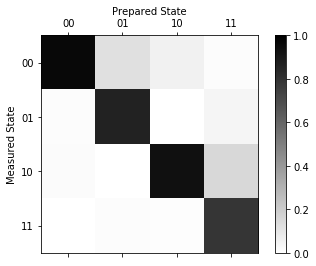

In [36]:
# Plot the calibration matrix
meas_fitter.plot_calibration()

#### The fidelity of the target in the original and the adapted circuit

In [37]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

# What is the measurement fidelity of Q0? - target of the adapted circuit
print("Average Measurement Fidelity of Q0: %f" % meas_fitter.readout_fidelity(
    label_list = [['00','01'],['10','11']]))

# What is the measurement fidelity of Q1? - target of the original circuit
print("Average Measurement Fidelity of Q1: %f" % meas_fitter.readout_fidelity(
    label_list = [['00','10'],['01','11']]))

Average Measurement Fidelity: 0.888250
Average Measurement Fidelity of Q0: 0.963250
Average Measurement Fidelity of Q1: 0.919750


#### Applying Calibration 

In [38]:
# Get the filter object
meas_filter = meas_fitter.filter

In [39]:
# Results of X3 with mitigation
mitigated_results = meas_filter.apply(result_DJ_r)
mitigated_counts = mitigated_results.get_counts(0)

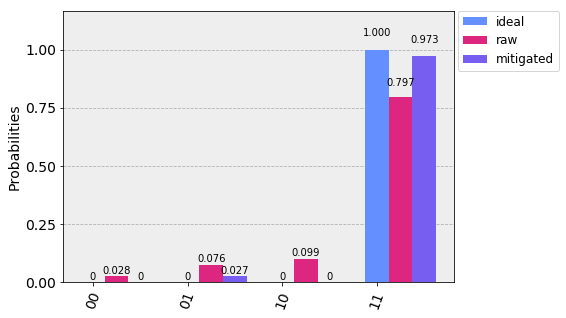

In [40]:
plot_histogram([counts_DJ_sim, counts_DJ_run, mitigated_counts], legend=['ideal', 'raw', 'mitigated'])